In [1]:
import sqlalchemy as sql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import scipy as sci

import cvxpy as cp
from cvxopt import matrix, solvers

In [2]:
home_dir = os.path.expandvars("$HOME")
app_src_dir = '/dev/repos/FinancialAnalyticsSystem/src'
sys.path.insert(0, home_dir + app_src_dir)

In [3]:
%load_ext autoreload
%autoreload 1


In [4]:
%aimport DataHandlingSystem
%aimport FeatureExtractionSystem

In [5]:
from DataHandlingSystem.DataLoadingSystem import *
from FeatureExtractionSystem.DeltaFeatureExtractor import * 

In [6]:
sql_pass = str(np.loadtxt('/home/l7/dev/docs/sql_login.txt', dtype=str))
db_name = 'stocks_eod'
owner = 'sql_manager'
data_loader = DataLoadingSystem(db_owner=owner, db_name=db_name, sql_pass=sql_pass)


/home/l7/dev/tools/anaconda3/envs/analytics_system_env_3.6.5/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [13]:
start_date = "2005-01-01"
end_date = '2019-01-01'
table_names = ['NVDA', 'MSFT', 'AXP', 'BA', 'CAT', 'BITTI_HE',
              'DAI_DE', 'MC_PA', 'UPM_HE', 'FORTUM_HE']


In [14]:
data_container, smallest_table = get_data_container(table_names=table_names,
                                                   start_date=start_date,
                                                   end_date=end_date,
                                                   data_loader=data_loader)

In [20]:
distance=30
change_df = get_change_data_frame(data_container, smallest_table,
                                 table_names,distance=distance)
change_df = change_df[distance:]

In [21]:
expected_returns = change_df.mean()
print("Number of observations: {}".format(change_df.index.size))
print("expected returns: {}".format(expected_returns))
sigma = np.cov(change_df.values, rowvar=False)
print("sigma: {}".format(sigma))
N = sigma.shape[0]
print("N: {}".format(N))

Number of observations: 3312
expected returns: NVDA         0.040878
MSFT         0.017833
AXP          0.014613
BA           0.022736
CAT          0.018134
BITTI_HE     0.014251
DAI_DE       0.013547
MC_PA        0.019141
UPM_HE       0.016622
FORTUM_HE    0.016530
dtype: float64
sigma: [[0.02823398 0.00519306 0.00604701 0.0063014  0.00733085 0.00704691
  0.00747399 0.00521583 0.00740853 0.00559445]
 [0.00519306 0.00578464 0.00426697 0.00251111 0.00341834 0.00400977
  0.00380833 0.00229204 0.00303996 0.00212668]
 [0.00604701 0.00426697 0.01345785 0.00571881 0.00796179 0.00648527
  0.0071942  0.00418724 0.00732134 0.00392274]
 [0.0063014  0.00251111 0.00571881 0.00799589 0.00513446 0.00529469
  0.00479256 0.0032326  0.00543865 0.00366134]
 [0.00733085 0.00341834 0.00796179 0.00513446 0.01248129 0.00553795
  0.00792624 0.00496075 0.00675503 0.0042122 ]
 [0.00704691 0.00400977 0.00648527 0.00529469 0.00553795 0.03203017
  0.00711623 0.00395222 0.00702155 0.00334561]
 [0.00747399 0.003808

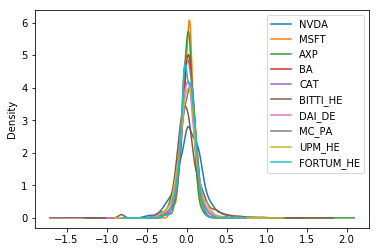

In [24]:
result = change_df.plot.density()

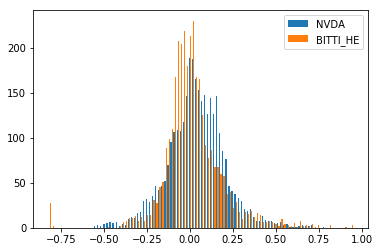

In [36]:
tables_to_check = ['NVDA','BITTI_HE']
bins = 100
plt.hist(change_df[tables_to_check].values,
        bins=bins,
        label=tables_to_check)
plt.legend()
plt.show()

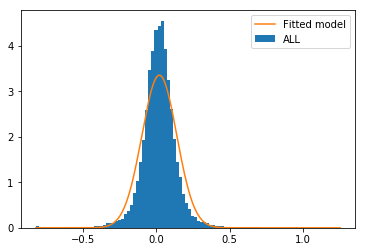

In [58]:
bins = 100
x = plt.hist(change_df.values.ravel(),
             density=True,
        bins=bins,
        label='ALL')
sample_fit = sci.stats.norm.fit(change_df.values.ravel())
sample_range = np.linspace(change_df.values.ravel().min(),
                           change_df.values.ravel().max(),
                           change_df.values.ravel().size,
                          )
sample_pdf = sci.stats.norm.pdf(sample_range,
                               loc=sample_fit[0],
                               scale=sample_fit[1])
plt.plot(sample_range,sample_pdf,
        '-',
         label='Fitted model',
        )
plt.legend()
plt.show()

In [44]:
loc = np.argmax(x[0])

In [45]:
x[1][loc]

0.02792526657309602

In [59]:
sample_fit = sci.stats.norm.fit(change_df.values.ravel())
sample_fit

(0.01942845580276714, 0.11901708543773784)